# Collect Tweets into MongoDB

In [1]:
!pip install pymongo

     |████████████████████████████████| 506 kB 24.7 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install pymongo[srv]

     |████████████████████████████████| 241 kB 24.9 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [4]:
!pip install tweepy

     |████████████████████████████████| 64 kB 2.6 MB/s  eta 0:00:01
     |████████████████████████████████| 146 kB 30.9 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [5]:
!pip install twitter

     |████████████████████████████████| 50 kB 6.1 MB/s  eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [6]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

In [8]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secrete']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secrete']

mongod_connect = config['mymongo']['connection']

In [10]:
client = MongoClient(mongod_connect)
db = client.gp19 # use or create a database named demo
tweet_collection = db.tweet_collection #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

In [17]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

In [18]:
count = 100 #number of returned tweets, default and max is 100
geocode = "38.4392897,-78.9412224,50mi"  # defin the location, in Harrisonburg, VA
q = "election"                               #define the keywords, tweets contain election

In [19]:
search_results = rest_api.search.tweets( count=count,q=q, geocode=geocode) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Thu Nov 04 19:24:19 +0000 2021'
'Thu Nov 04 19:01:04 +0000 2021'
'Thu Nov 04 18:53:35 +0000 2021'
'Thu Nov 04 18:53:03 +0000 2021'
'Thu Nov 04 18:34:23 +0000 2021'
'Thu Nov 04 18:29:26 +0000 2021'
'Thu Nov 04 17:54:44 +0000 2021'
'Thu Nov 04 17:30:55 +0000 2021'
'Thu Nov 04 17:20:52 +0000 2021'
'Thu Nov 04 17:09:48 +0000 2021'
'Thu Nov 04 17:05:44 +0000 2021'
'Thu Nov 04 16:35:34 +0000 2021'
'Thu Nov 04 16:35:32 +0000 2021'
'Thu Nov 04 16:31:56 +0000 2021'
'Thu Nov 04 16:28:51 +0000 2021'
'Thu Nov 04 15:45:00 +0000 2021'
'Thu Nov 04 15:36:20 +0000 2021'
'Thu Nov 04 15:29:46 +0000 2021'
'Thu Nov 04 15:15:46 +0000 2021'
'Thu Nov 04 15:00:06 +0000 2021'
'Thu Nov 04 14:58:37 +0000 2021'
'Thu Nov 04 14:56:03 +0000 2021'
'Thu Nov 04 14:55:11 +0000 2021'
'Thu Nov 04 14:54:53 +0000 2021'
'Thu Nov 04 14:49:13 +0000 2021'
'Thu Nov 04 14:47:31 +0000 2021'
'Thu Nov 04 14:41:20 +0000 2021'
'Thu Nov 04 14:34:59 +0000 2021'
'Thu Nov 04 14:30:42 +0000 2021'
'Thu Nov 04 14:28:05 +0000 2021'
'Thu Nov 0

In [20]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                        geocode=geocode, max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Thu Nov 04 00:05:51 +0000 2021'
'Wed Nov 03 23:36:01 +0000 2021'
'Wed Nov 03 23:21:46 +0000 2021'
'Wed Nov 03 23:18:15 +0000 2021'
'Wed Nov 03 23:12:51 +0000 2021'
'Wed Nov 03 23:12:31 +0000 2021'
'Wed Nov 03 23:09:25 +0000 2021'
'Wed Nov 03 23:09:24 +0000 2021'
'Wed Nov 03 23:02:49 +0000 2021'
'Wed Nov 03 23:01:10 +0000 2021'
'Wed Nov 03 22:59:50 +0000 2021'
'Wed Nov 03 22:52:47 +0000 2021'
'Wed Nov 03 22:51:44 +0000 2021'
'Wed Nov 03 22:50:58 +0000 2021'
'Wed Nov 03 22:49:05 +0000 2021'
'Wed Nov 03 22:45:31 +0000 2021'
'Wed Nov 03 22:44:46 +0000 2021'
'Wed Nov 03 22:38:15 +0000 2021'
'Wed Nov 03 22:28:20 +0000 2021'
'Wed Nov 03 22:20:47 +0000 2021'
'Wed Nov 03 22:03:45 +0000 2021'
'Wed Nov 03 21:47:03 +0000 2021'
'Wed Nov 03 21:46:39 +0000 2021'
'Wed Nov 03 21:38:53 +0000 2021'
'Wed Nov 03 21:37:00 +0000 2021'
'Wed Nov 03 21:36:40 +0000 2021'
'Wed Nov 03 21:36:25 +0000 2021'
'Wed Nov 03 21:32:09 +0000 2021'
'Wed Nov 03 21:26:03 +0000 2021'
'Wed Nov 03 21:16:39 +0000 2021'
'Wed Nov 0

'Wed Nov 03 03:30:00 +0000 2021'
'Wed Nov 03 03:28:57 +0000 2021'
'Wed Nov 03 03:27:49 +0000 2021'
'Wed Nov 03 03:15:10 +0000 2021'
'Wed Nov 03 03:11:22 +0000 2021'
'Wed Nov 03 03:10:21 +0000 2021'
'Wed Nov 03 03:08:44 +0000 2021'
'Wed Nov 03 03:05:32 +0000 2021'
'Wed Nov 03 03:04:47 +0000 2021'
'Wed Nov 03 03:04:21 +0000 2021'
'Wed Nov 03 02:45:10 +0000 2021'
'Wed Nov 03 02:45:05 +0000 2021'
'Wed Nov 03 02:43:40 +0000 2021'
'Wed Nov 03 02:42:35 +0000 2021'
'Wed Nov 03 02:40:44 +0000 2021'
'Wed Nov 03 02:37:26 +0000 2021'
'Wed Nov 03 02:28:50 +0000 2021'
'Wed Nov 03 02:28:42 +0000 2021'
'Wed Nov 03 02:24:31 +0000 2021'
'Wed Nov 03 02:16:47 +0000 2021'
'Wed Nov 03 02:15:30 +0000 2021'
'Wed Nov 03 02:12:14 +0000 2021'
'Wed Nov 03 02:09:53 +0000 2021'
'Wed Nov 03 02:09:35 +0000 2021'
'Wed Nov 03 02:03:30 +0000 2021'
'Wed Nov 03 02:03:11 +0000 2021'
'Wed Nov 03 02:01:56 +0000 2021'
'Wed Nov 03 02:00:44 +0000 2021'
'Wed Nov 03 01:51:07 +0000 2021'
'Wed Nov 03 01:50:56 +0000 2021'
'Wed Nov 0

'Tue Nov 02 16:05:59 +0000 2021'
'Tue Nov 02 16:02:08 +0000 2021'
'Tue Nov 02 16:01:17 +0000 2021'
'Tue Nov 02 16:00:22 +0000 2021'
'Tue Nov 02 15:58:41 +0000 2021'
'Tue Nov 02 15:56:47 +0000 2021'
'Tue Nov 02 15:54:42 +0000 2021'
'Tue Nov 02 15:53:50 +0000 2021'
'Tue Nov 02 15:53:08 +0000 2021'
'Tue Nov 02 15:52:09 +0000 2021'
'Tue Nov 02 15:44:57 +0000 2021'
'Tue Nov 02 15:40:04 +0000 2021'
'Tue Nov 02 15:34:46 +0000 2021'
'Tue Nov 02 15:30:35 +0000 2021'
'Tue Nov 02 15:28:56 +0000 2021'
'Tue Nov 02 15:22:59 +0000 2021'
'Tue Nov 02 15:19:52 +0000 2021'
'Tue Nov 02 15:19:44 +0000 2021'
'Tue Nov 02 15:10:47 +0000 2021'
'Tue Nov 02 15:07:50 +0000 2021'
'Tue Nov 02 15:07:12 +0000 2021'
'Tue Nov 02 15:02:17 +0000 2021'
'Tue Nov 02 15:01:29 +0000 2021'
'Tue Nov 02 15:00:52 +0000 2021'
'Tue Nov 02 14:54:28 +0000 2021'
'Tue Nov 02 14:51:39 +0000 2021'
'Tue Nov 02 14:49:11 +0000 2021'
'Tue Nov 02 14:48:25 +0000 2021'
'Tue Nov 02 14:46:30 +0000 2021'
'Tue Nov 02 14:44:41 +0000 2021'
'Tue Nov 0

'Mon Nov 01 16:48:57 +0000 2021'
'Mon Nov 01 16:45:07 +0000 2021'
'Mon Nov 01 16:42:37 +0000 2021'
'Mon Nov 01 16:40:18 +0000 2021'
'Mon Nov 01 16:29:51 +0000 2021'
'Mon Nov 01 16:29:08 +0000 2021'
'Mon Nov 01 16:28:58 +0000 2021'
'Mon Nov 01 16:05:00 +0000 2021'
'Mon Nov 01 16:02:05 +0000 2021'
'Mon Nov 01 15:38:09 +0000 2021'
'Mon Nov 01 15:35:33 +0000 2021'
'Mon Nov 01 15:12:24 +0000 2021'
'Mon Nov 01 15:04:06 +0000 2021'
'Mon Nov 01 14:59:37 +0000 2021'
'Mon Nov 01 14:32:26 +0000 2021'
'Mon Nov 01 14:30:26 +0000 2021'
'Mon Nov 01 13:51:08 +0000 2021'
'Mon Nov 01 13:47:27 +0000 2021'
'Mon Nov 01 13:38:55 +0000 2021'
'Mon Nov 01 13:36:56 +0000 2021'
'Mon Nov 01 13:13:38 +0000 2021'
'Mon Nov 01 13:09:25 +0000 2021'
'Mon Nov 01 13:03:43 +0000 2021'
'Mon Nov 01 12:56:32 +0000 2021'
'Mon Nov 01 12:55:41 +0000 2021'
'Mon Nov 01 12:47:27 +0000 2021'
'Mon Nov 01 12:47:25 +0000 2021'
'Mon Nov 01 12:43:24 +0000 2021'
'Mon Nov 01 12:42:01 +0000 2021'
'Mon Nov 01 12:41:47 +0000 2021'
'Mon Nov 0

'Fri Oct 29 13:37:59 +0000 2021'
'Fri Oct 29 13:18:05 +0000 2021'
'Fri Oct 29 13:00:06 +0000 2021'
'Fri Oct 29 12:56:48 +0000 2021'
'Fri Oct 29 12:38:26 +0000 2021'
'Fri Oct 29 12:10:12 +0000 2021'
'Fri Oct 29 12:10:00 +0000 2021'
'Fri Oct 29 12:03:41 +0000 2021'
'Fri Oct 29 11:57:39 +0000 2021'
'Fri Oct 29 11:40:21 +0000 2021'
'Fri Oct 29 11:20:39 +0000 2021'
'Fri Oct 29 11:07:07 +0000 2021'
'Fri Oct 29 10:19:59 +0000 2021'
'Fri Oct 29 09:55:56 +0000 2021'
'Fri Oct 29 09:18:03 +0000 2021'
'Fri Oct 29 07:47:37 +0000 2021'
'Fri Oct 29 06:33:49 +0000 2021'
'Fri Oct 29 06:19:00 +0000 2021'
'Fri Oct 29 06:13:32 +0000 2021'
'Fri Oct 29 06:12:33 +0000 2021'
'Fri Oct 29 05:44:28 +0000 2021'
'Fri Oct 29 04:40:52 +0000 2021'
'Fri Oct 29 03:54:35 +0000 2021'
'Fri Oct 29 03:04:37 +0000 2021'
'Fri Oct 29 02:54:48 +0000 2021'
'Fri Oct 29 02:39:00 +0000 2021'
'Fri Oct 29 02:34:39 +0000 2021'
'Fri Oct 29 02:25:18 +0000 2021'
'Fri Oct 29 02:10:48 +0000 2021'
'Fri Oct 29 01:47:11 +0000 2021'
'Fri Oct 2

In [31]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users 

1281
628


In [32]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index


'text_index'

In [33]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "covid19"}}) # return tweets contain vote

In [34]:

for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

In [40]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "covid"}}) # return tweets contain vote

In [41]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,...,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,quoted_status_id,quoted_status_id_str,quoted_status
0,6184352b3ce5dde40a6b46c3,Wed Nov 03 19:21:57 +0000 2021,1455978574117232643,1455978574117232643,The COVID-19 mask is similar to other apparel ...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",None,...,False,3,3,False,False,False,en,NaN,NaN,NaN
1,618435073ce5dde40a6b4677,Thu Nov 04 03:40:25 +0000 2021,1456104015381602305,1456104015381602305,dude Trump asserted covid would be gone with t...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",None,...,True,0,0,False,False,False,en,1.455867e+18,1455867360968052741,{'created_at': 'Wed Nov 03 12:00:02 +0000 2021...
2,618435393ce5dde40a6b498d,Mon Nov 01 16:29:08 +0000 2021,1455210306574163985,1455210306574163985,Says the Senator who participated in spreading...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",None,...,True,0,0,False,False,False,en,1.455180e+18,1455180010646646786,{'created_at': 'Mon Nov 01 14:28:45 +0000 2021...


<AxesSubplot:>

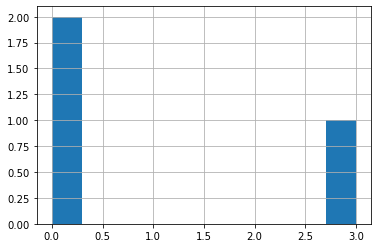

In [42]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count